In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style("darkgrid")

import warnings
def ignore_warns(*args, **kwargs):
    pass
warnings.warn = ignore_warns
from scipy import stats
from scipy.stats import norm, skew
import sklearn.preprocessing as skl

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
Id = test["Id"].copy()

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
isin = [X in train.columns for X in test.columns]

In [8]:
False in isin

False

## Outlier removing

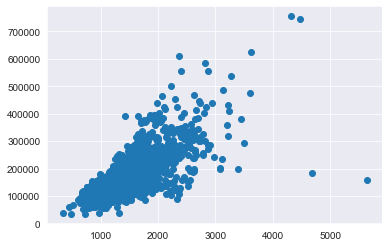

In [9]:
plt.scatter(train["GrLivArea"], train["SalePrice"])

In [10]:
train.drop(train[(train["GrLivArea"]> 4000) & (train["SalePrice"]<300000)].index, inplace = True)

## Analysis of the value to be predicted

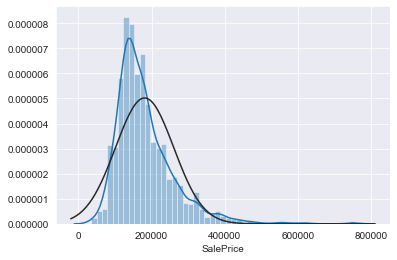

In [11]:
plot = sns.distplot(train["SalePrice"], fit = norm)

In [12]:
print("Skewness = %f" %train["SalePrice"].skew())
print("kurtosis = %f" %train["SalePrice"].kurt())

Skewness = 1.881296
kurtosis = 6.523067


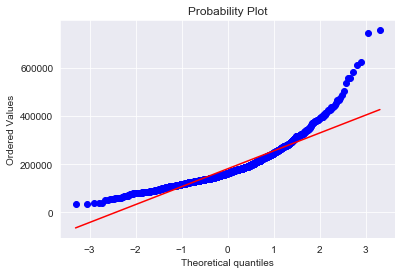

In [13]:
res = stats.probplot(train["SalePrice"], plot = plt)

In [14]:
#Right skewed data
#Applying log Transformation
train["SalePrice"] = np.log1p(train["SalePrice"])

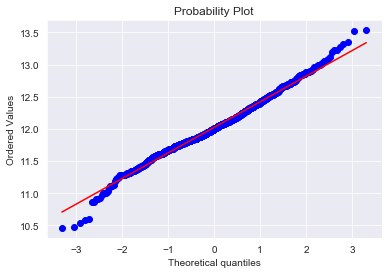

In [15]:
res = stats.probplot(train["SalePrice"], plot = plt)

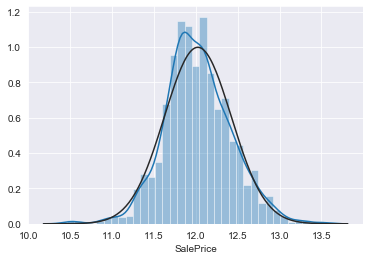

In [16]:
sns.distplot(train["SalePrice"], fit = norm)

In [17]:
SalePrice = train[["SalePrice","Id"]].copy()
SalePrice.shape

(1458, 2)

## Empty values

In [18]:
total = train.isnull().sum().sort_values(ascending = False)

In [19]:
percent = ((train.isnull().sum()/ train.isnull().count())*100).sort_values(ascending = False)

In [20]:
missing = pd.concat([total, percent],axis =1, keys=["total", "percent"])

In [21]:
train[missing[missing["total"] > 0].index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageCond       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [22]:
corrmat = train.corr()

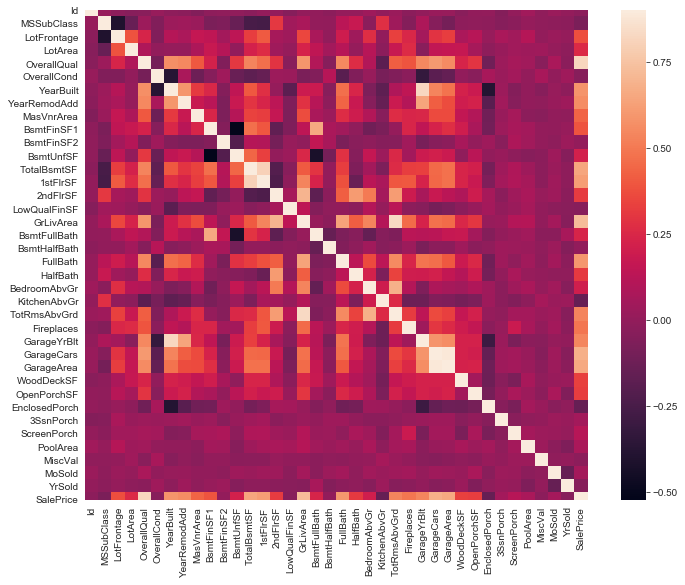

In [23]:
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 0.9, square= True)

In [24]:
train[["GarageArea","GarageCars"]].dtypes

GarageArea    int64
GarageCars    int64
dtype: object

In [25]:
all_data = pd.concat((train, test)).reset_index(drop = True)

In [26]:
all_data.drop("SalePrice", axis =1, inplace = True)

In [27]:
#redundant featues cars and area
all_data.drop("GarageArea",axis  =1, inplace = True)

In [28]:
all_data["Fireplaces"].value_counts()

0    1420
1    1267
2     219
3      10
4       1
Name: Fireplaces, dtype: int64

In [29]:
#imputing missing features
all_data["PoolQC"].fillna("None", inplace = True)
all_data["MiscFeature"].fillna("None", inplace = True)
all_data["Alley"].fillna("No_alley", inplace = True)
all_data["Fence"].fillna("None", inplace =True)

In [30]:
all_data["FireplaceQu"].fillna("None", inplace = True)
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [31]:
pd.set_option("display.max_columns",80)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,No_alley,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,No_alley,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,No_alley,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,No_alley,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,No_alley,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [32]:
(all_data["GarageCond"] == all_data["GarageQual"]).sum()

2608

In [33]:
all_data["GarageQual"].fillna("None", inplace = True)
all_data.drop("GarageCond",axis =1, inplace = True)

In [34]:
all_data["GarageFinish"].fillna("None", inplace =True)
all_data["GarageType"].fillna("None", inplace = True)
all_data["GarageYrBlt"].fillna(0, inplace = True)

In [35]:
bsmt = ["BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual"]
for i in bsmt:
    all_data[i].fillna("No_basement", inplace = True)

In [36]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [37]:
bsmt = ["BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1"]
for col in bsmt:
    all_data[col].fillna(0, inplace =True)

In [38]:
all_data["GarageCars"].fillna(0, inplace = True)

In [39]:
all_data["TotalBsmtSF"].fillna(0, inplace = True)

In [40]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

In [41]:
mode = ["Utilities", "Electrical", "Exterior1st", "Exterior2nd", "SaleType", "KitchenQual", "Functional"]
for item in mode:
    all_data[item] = all_data[item].fillna(all_data[item].mode()[0])

In [42]:
still_null = all_data.isnull().sum().sort_values(ascending = False)
all_data[still_null[still_null>0].index].dtypes

Series([], dtype: object)

## Feature Engineering

In [43]:
#adding one important feature
all_data["TotalSF"] = all_data["TotalBsmtSF"] + all_data["1stFlrSF"] + all_data["2ndFlrSF"]

In [44]:
#removed two redundant feature GarageCond and GarageArea
print("Shape of train data:{}".format(train.shape))
print("Shape of test data:{}".format(test.shape))
print("Shape of all_data:{}".format(all_data.shape))

Shape of train data:(1458, 81)
Shape of test data:(1459, 80)
Shape of all_data:(2917, 79)


In [45]:
all_data.dtypes[all_data.dtypes != "object"]

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtUnfSF        float64
EnclosedPorch      int64
Fireplaces         int64
FullBath           int64
GarageCars       float64
GarageYrBlt      float64
GrLivArea          int64
HalfBath           int64
Id                 int64
KitchenAbvGr       int64
LotArea            int64
LotFrontage      float64
LowQualFinSF       int64
MSSubClass         int64
MasVnrArea       float64
MiscVal            int64
MoSold             int64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
PoolArea           int64
ScreenPorch        int64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF         int64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
TotalSF          float64
dtype: object

In [46]:
#transforming numerial features to Categorical ones
#Added kitchenAbvGr because of the Heatmap
category = ["MSSubClass", "YrSold", "MoSold"]
for item in category:
    all_data[item] = all_data[item].apply(str)

In [47]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,No_alley,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,2.0,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,2566.0
1,1262,0,0,No_alley,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,2.0,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,2524.0
2,920,866,0,No_alley,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,2.0,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,2706.0
3,961,756,0,No_alley,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,3.0,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,2473.0
4,1145,1053,0,No_alley,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,3.0,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,3343.0


In [48]:
label = ["BsmtCond", "BsmtQual", "CentralAir","BsmtFinType1","BsmtFinType2",
         "ExterCond","ExterQual","FireplaceQu","GarageQual",
        "Functional", "GarageFinish", "HeatingQC","KitchenQual",
        "LandSlope","PoolQC","MoSold", "YrSold"]

In [49]:
#Label Encoding for Categorial variables with sequence
from sklearn.preprocessing import LabelEncoder
for cols in label:
    lbl = LabelEncoder()
    lbl.fit(all_data[cols])
    all_data[cols] = lbl.transform(all_data[cols]) 

In [50]:
train_df = all_data[:1458]
train_df = pd.merge(train_df, SalePrice, on= "Id" )

In [51]:
numeric = train_df.dtypes[train_df.dtypes != "object"].index
boxcox = train_df[numeric].skew().sort_values(ascending = False)

In [52]:
test = all_data.loc[1458:]

In [53]:
#Boxcox transformation
boxcox = boxcox[abs(boxcox)>.75]
skewed = list(boxcox.index)
from scipy.special import boxcox1p
lam = 0.15
for col in skewed:
    train_df[col] = boxcox1p(train_df[col],lam)
    test[col] = boxcox1p(test[col],lam)

In [54]:
all_data = pd.concat((train_df.drop("SalePrice", axis =1), test)).reset_index(drop = True)

In [55]:
all_data = pd.get_dummies(all_data)

In [56]:
all_data.shape

(2917, 252)

In [57]:
train = all_data[:1458]
test = all_data[1458:].drop("Id", axis =1)
train = pd.merge(train, SalePrice, on = "Id")
train = train.drop("Id", axis =1)

## Modeling using octave program

In [58]:
#for using in octave
X = np.array(train.drop("SalePrice", axis = 1))
y = train["SalePrice"][:,np.newaxis]
X_test = np.array(test)

In [59]:
np.savetxt("X.txt",X)
np.savetxt("X_test.txt",X_test)
np.savetxt("y.txt",y)

In [60]:
pred = pd.read_csv("pred.txt", header = None)

In [61]:
Id = np.arange(1461, 1461+pred.shape[0])

In [62]:
pred["Id"] = Id

In [63]:
pred.rename(columns={0:"SalePrice"}, inplace=True)

In [64]:
pred = pred[["Id", "SalePrice"]]

In [65]:
pred.to_csv("pred.csv", index = False)

## Modeling using Python Libraries

In [1]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


In [67]:
n_fold = 5
def model_perf(model):
    kfold = KFold(n_fold, shuffle= True, random_state= 42).get_n_splits(X)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv= kfold))
    return rmse

In [68]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

In [69]:
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = 0.7,random_state = 2))

In [70]:
#No_pipeline_needed_for RobustScaling
KRR = KernelRidge(alpha=.05, kernel='polynomial', degree=1, coef0=2.5)

In [71]:
class AverageModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        for models in self.models_:
            models.fit(X,y)
        return self
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1) 

In [72]:
averge_model = AverageModel(models = [lasso, Enet, KRR])

In [73]:
model_perf(averge_model).mean()

0.11051658519800925

In [74]:
model_perf(averge_model).std()

0.006250928529084057

In [75]:
averge_model.fit(X,y)
y_pred = averge_model.predict(X_test).reshape(X_test.shape[0],1)

In [76]:
submission2 = pd.DataFrame()
submission2["Id"]  = np.arange(1461, 2920)
submission2["SalePrice"] = np.exp(y_pred)
submission2.to_csv("Submission2.csv", index = None)